In [ ]:
!pip install torchviz
!pip install graphviz
!pip install hiddenlayer
!pip install torchview
!pip install torchsummary

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=f8f3ad7603955b3be281be8676cdac757f271e7d03f117d8c511535b6b5b2447
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt # data visualization library

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [ ]:
!pip3 install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# PCA Faces

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some sid

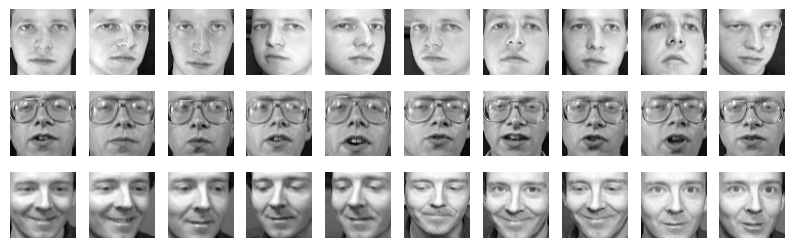

In [ ]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))

    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [ ]:
D = faces.data
D.shape

(400, 4096)

a) PCA Implementation

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def PCA_transform_inverse(D, r):
    # Perform PCA on the data
    mu = np.mean(D, axis=0)
    C = D - mu

    # Perform the truncated SVD
    svd = TruncatedSVD(n_components=r)
    low_dim_data = svd.fit_transform(C)

    return low_dim_data, svd.components_, mu

Principal Components as Images

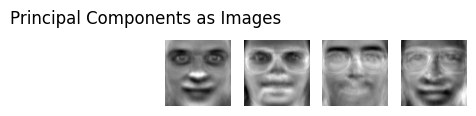

In [ ]:
org_data, comp, mu = PCA_transform_inverse(D, 30)
fig = plt.figure(figsize=(10, 3))
for i in range(5,9):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    ax.imshow(comp[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

plt.suptitle('Principal Components as Images')
plt.show()

b) Coordinates of index 4

In [ ]:
r = 3
low_dim, comp, mu = PCA_transform_inverse(D, r)

d_5 = D[4]
d_5_centered = d_5 - mu
coord_5 = np.dot(d_5_centered, comp.T)

print("Coord:", coord_5)

Coord: [-3.962008  -3.2938685  3.6528645]


Verify the coordinates by using PCA from sklearn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
low_dim = pca.fit_transform(D)

index_of_interest = 4  # Python index, so the 5th data point has index 4
coord = low_dim[index_of_interest]

# Print the coordinates
print("Coord:", coord)

Coord: [-3.9620085 -3.293873   3.6528633]


c) Face Reconstruction with r = 50 and given low-dimentional representation

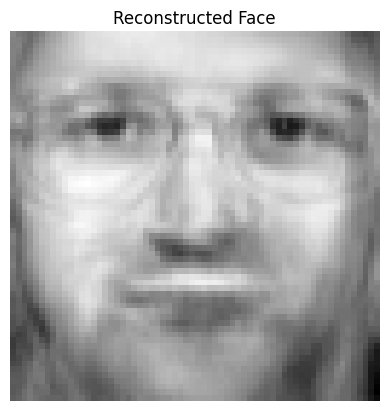

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd

r = 50

mu = np.mean(D, axis=0)
C = D - mu

U, s, Vt = svd(C, full_matrices=False)

low_dim_rep = np.concatenate([0.5 * np.ones(25), -0.5 * np.ones(25)])

rec_face = mu + np.dot(low_dim_rep, Vt[:r, :])
final_rec_face = rec_face.reshape(64, 64)

plt.imshow(final_rec_face, cmap=plt.cm.gray)
plt.title("Reconstructed Face")
plt.axis('off')
plt.show()

# k-means initialization

In [ ]:
!pip3 show numpy

Name: numpy
Version: 1.26.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

If your versions don't match, the following commands (or their anaconda version) could help to get the newest stable release. If you need help with this, please ask the TAs during instruction hours.

In [ ]:
!pip3 install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


The functions generating the datasets are given here:

In [ ]:
!pip3 install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip3 install scipy --upgrade

In [ ]:
def generateMoons(epsilon, n):
    moons, labels = sklearn.datasets.make_moons(n_samples=n, noise=epsilon, random_state=7)
    return "moons", moons, labels, 2
def generateBlobs(epsilon, n):
    blobs, labels = sklearn.datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 1, epsilon + 1.5, epsilon + 0.5], random_state=54)
    return "blobs", blobs, labels, 3

Implement the centroid initialization here. Right now, it returns a random initialization.

In [ ]:
def default_init_centroids_greedy_pp(D,r,l=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''
    rng =  np.random.default_rng(seed=7) # use this random generator to sample the candidates (sampling according to given probabilities can be done via rng.choice(..))
    n,d = D.shape

    indexes = rng.integers(low=0, high=n, size=r)
    X = np.array(D[indexes,:]).T
    return X

Implementation of the Centroid Init

In [ ]:
def dist_matrix(D, X):
    #return min([np.sum((Di - X[:,i])**2) for i in range(X.shape[1])])
    Z = np.sum((np.expand_dims(D,2) - X)**2,1)
    return Z
def dist_vec(D,X):
    Z = dist_matrix(D,X)
    return np.min(Z,1)
def dist_sum(D,X):
    v = dist_vec(D,X)
    return np.sum(v)
def init_centroids_greedy_pp(D,r, num_local_trials=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :return: (np-array) 'X' the selected centroids from the dataset
    '''
    rng = np.random.default_rng(seed=7)
    n,d = D.shape

    s = 1
    candidates = rng.integers(low=0, high=n, size=num_local_trials)
    Z = dist_matrix(D,D[candidates,:].T)
    i = candidates[np.argmin(np.sum(Z,0))]
    X = np.array([D[i,:]]).T
    while s < r:
        s += 1
        Pis = dist_vec(D,X)
        Pis = Pis/sum(Pis)
        candidates = rng.choice(np.arange(0, n), p=Pis, size =num_local_trials)
        cand_dist = [dist_sum( D,np.hstack((X,np.expand_dims(D[c,:].T,1))) ) for c in candidates]
        i = candidates[np.argmin(cand_dist)]
        X = np.append(X,np.array([D[i,:]]).T,axis=1)
    return X

In [ ]:
import scipy
def spectral_clustering(W,r, X_init):
    '''
        :param W: (np-array) nxn similarity/weighted adjacency matrix
        :param r: (int) number of centroids (clusters)
        :param X_init: (function) the centroid initialization function
        :return: (np-array) 'Y' the computed cluster assignment matrix
    '''
    np.random.seed(0)
    L = np.diag(np.array(W.sum(0))[0]) - W
    v0 = np.random.rand(min(L.shape))
    Lambda, V = scipy.sparse.linalg.eigsh(L, k=r+1, which="SM", v0=v0)
    A = V[:,1:] #remove the first eigenvector, assuming that the graph is conected
    initial_points = X_init(A,r)
    X, Y = kmeans(A, r, initial_points)

    return Y

This is the $k$-means implementation from the lecture accompanying notebook.

In [ ]:
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)
def getY(labels):
    '''
        Compute the cluster assignment matrix Y from the categorically encoded labels
    '''
    Y = np.eye(max(labels)+1)[labels]
    return Y
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum((np.expand_dims(D,2) - X)**2,1)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0
    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y

## Running k-means on the blobs dataset
We generate the blobs dataset. Run kmeans based on the initialization technique. Finally, we plot the clustering. The initial centroids are marked in red, and the final centroids are marked in blue. You can use this visualization to see if your initialization makes sense. It doesn't work for spectral clustering.

In [ ]:
n=500
dataID, D, labels, r = generateBlobs(epsilon=0.05,n=n)

NameError: name 'sklearn' is not defined

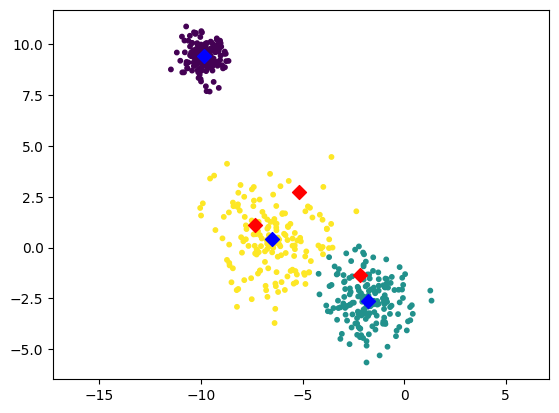

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
ax.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D') # initial centroids are in red
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D') # computed centroids are in blue
plt.show()

3a) Compute the error and the NMI value

In [ ]:
n=500
dataID, D, labels, r = generateBlobs(0.05,n)

X_init = init_centroids_greedy_pp(D,r)
X,Y = kmeans(D,r, X_init)

predicted = Y.argmax(axis=1)
norm = np.linalg.norm(D - np.dot(Y, X.T), 'fro')**2

n,d = D.shape
result = norm/(n*d)

nmi_score = normalized_mutual_info_score(labels, predicted)

print(f"Error: {result}")
print(f"Blobs NMI: {nmi_score}")

## Running spectral clustering on the two moons dataset
We generate the moons dataset and compute spectral clustering with the implemented initialization technique.

In [ ]:
dataID, D, labels, r = generateMoons(0.05,n)

4 iterations


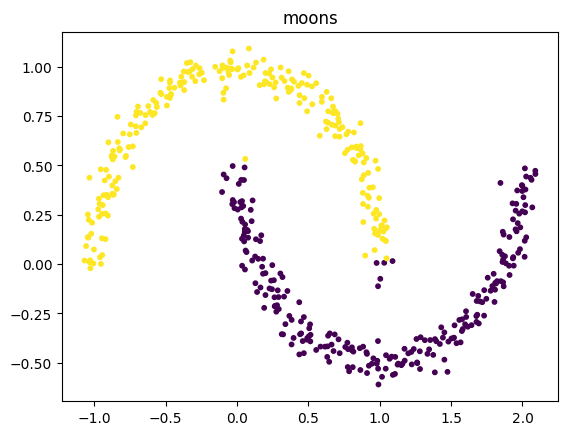

In [ ]:
from sklearn.neighbors import radius_neighbors_graph, kneighbors_graph
# Implement here the computation of W as knn graph
W = radius_neighbors_graph(D,0.5,include_self=False)
Y = spectral_clustering(W,r,init_centroids_greedy_pp)

plt.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
plt.title('%s'  % ( dataID) )
plt.show()

3b) To find the NMI scores for each KNN value

In [ ]:
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.cluster import normalized_mutual_info_score

fig = plt.figure(figsize=(10, 15))
pltnum = 1
dataID, D, labels, r = generateMoons(0.05,n)
for n_neighbors in [5,10,20,40]:
    N = kneighbors_graph(D, n_neighbors=n_neighbors,include_self=False, n_jobs=-1)
    W = 0.5*(N+N.T)
    Y = spectral_clustering(W,r,init_centroids_greedy_pp)

    plt.subplot(4, 2, pltnum)
    pltnum += 1
    plt.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
    plt.title('kNN: %i, NMI: %.5f'% (n_neighbors, normalized_mutual_info_score(labels, np.argmax(Y,axis=1))) )

# Your own personal Netflix
## Data Preprocessing

To read the dataset you might need to alter the path to look for it:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # pandas is a data manipulation library
# lets explore movies.csv
movies= pd.read_csv('/content/sample_data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# lets explore ratings.CSV
ratings=pd.read_csv('/content/sample_data/ratings.csv',sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


The given ratings are in the range of 0.5 and 5:

In [ ]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

We convert the sparse data representation of movie ratings into a data matrix. The missing values are filled with zeros.

In [ ]:
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ
df_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We consider here only the movies which have been rated by more than 100 users. That are 134 movies. We will not be able to infer a pattern for movies with very few observations anyways, but for this exercise we are mostly interested in the prnciple and do not need a big dataset.

In [ ]:
import numpy as np
np.sum(np.sum(df_movie_ratings!=0,0)>100)

134

In [ ]:
keep_movie = np.sum(df_movie_ratings!=0,0)>100
df_D = df_movie_ratings.loc[:,keep_movie]
df_D.head()

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Furthermore, we will throw out all the users which have rated fewer than five movies. It would be hard anyways to make recommendations based on 4 movies.

In [ ]:
np.sum(np.sum(df_D!=0,1)>=5)

556

The resulting dataset has the userID as rows and movieIDs as columns. Hence, userID 1 and 4 addresses the first two rows of this dataset.

In [ ]:
keep_user = np.sum(df_D!=0,1)>=5
df_D = df_D.loc[keep_user,:]
df_D.head()

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,4.0,3.0,4.0,4.0,0.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movie number- title assignments are given as follows:

In [ ]:
movies.loc[movies['movieId'].isin(df_D.columns)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
5,6,Heat (1995),Action|Crime|Thriller
9,10,GoldenEye (1995),Action|Adventure|Thriller
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
6772,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
7039,68954,Up (2009),Adventure|Animation|Children|Drama


The resulting data matrix is given as follows:

In [ ]:
D = df_D.to_numpy()
D.shape

(556, 134)

## Optimization
Use the following initialization for your implementation of the optimization scheme.

Implementation of the Matrix Completion

In [ ]:
def MatrixCompletion(D, r, t_max=100, l=0.1):
    np.random.seed(0)
    n, d = D.shape
    X = np.random.normal(size=(d, r))
    Y = np.random.normal(size=(n, r))
    O = (D != 0).astype(int)

    for t in range(t_max):
        for k in range(d):
            Oxk = np.diag(O[:, k])
            X[k, :] = D[:, k].T @ Y @ np.linalg.inv((Y.T @ Oxk @ Y + l * np.eye(r)))
        for i in range(n):
            Oyi = np.diag(O[i, :])
            Y[i, :] = D[i, :] @ X @ np.linalg.inv((X.T @ Oyi @ X + l * np.eye(r)))

    return X, Y

In [ ]:
X, Y = MatrixCompletion(D, r = 20, t_max = 100, l = 0.1)

Compute the Loss

In [ ]:
O = (D != 0).astype(int)
approx_err = D - O * (Y @ X.T)
avg_approx_err = np.sum(approx_err**2) / np.count_nonzero(O)
print(f"the average squared approximation error: {avg_approx_err}")

the average squared approximation error: 0.09391714344490973


a) Compute the movie ratings for the first user

In [ ]:
pred_D = Y @ X.T

movie_name = [
    "Lord of the Rings: The Two Towers, The (2002)", "Dark Knight, The (2008)",
    "Clueless (1995)", "2001: A Space Odyssey (1968)"
]

movie_name_id = {
    name: movies.loc[movies['title'] == name]['movieId'].values[0]
    for name in movie_name
}
print("the estimated rating for the first user")
for name in movie_name_id:
    col_idx = np.where(df_D.columns == movie_name_id[name])[0][0]
    print(f"[{movie_name_id[name]:5d}]{name}: {pred_D[0][col_idx]:.4f}")

the estimated rating for the first user
[ 5952]Lord of the Rings: The Two Towers, The (2002): 5.7400
[58559]Dark Knight, The (2008): 6.9282
[   39]Clueless (1995): 4.9411
[  924]2001: A Space Odyssey (1968): 4.0877


Right answers:

*   Lord of the Rings: The Two Towers: 5.74 (0.1 margin)
*   Dark Knight: 6.9282 (0.1 margin)
*   Clueless : 4.9411 (0.1 margin)
*   2001: A Space Odyssey: 4.08765 (0.1 margin)
*   Loss: 0.09392 (0.002 margin)



b) Compute the values for different lambas

In [ ]:
lambdas = [0.01, 0.1, 0.5]

for lamb in lambdas:
    O = (D != 0).astype(int)
    X, Y = MatrixCompletion(D, r=20, t_max=100, l=lamb)
    pred_D = Y @ X.T

    approx_err = np.sum((D - O * (Y @ X.T)) ** 2)

    miss_D = pred_D * (1 - O)
    miss_D = miss_D[miss_D != 0]

    out_elems = miss_D[(miss_D < 0.5) | (miss_D > 5)]
    out_p = len(out_elems) / len(miss_D)

    means = np.mean(miss_D)
    var = np.var(miss_D)

    print(f"lambda: {lamb}")
    print(f"error approximation: {approx_err}")
    print(f"missing value mean: {means}")
    print(f"missing value variance: {var}")
    print(f"probability of missing values: {out_p}\n")

lambda: 0.01
error approximation: 1824.3736271820676
missing value mean: 3.325812050888218
missing value variance: 6.161466574588246
probability of missing values: 0.2667214012041598

lambda: 0.1
error approximation: 1849.6042230040523
missing value mean: 3.0314893258509374
missing value variance: 3.4138974315242203
probability of missing values: 0.19507389162561575

lambda: 0.5
error approximation: 2002.371607694266
missing value mean: 3.3462604944459677
missing value variance: 1.315182774487906
probability of missing values: 0.0745666849115125



# MNIST ANN

## 4a
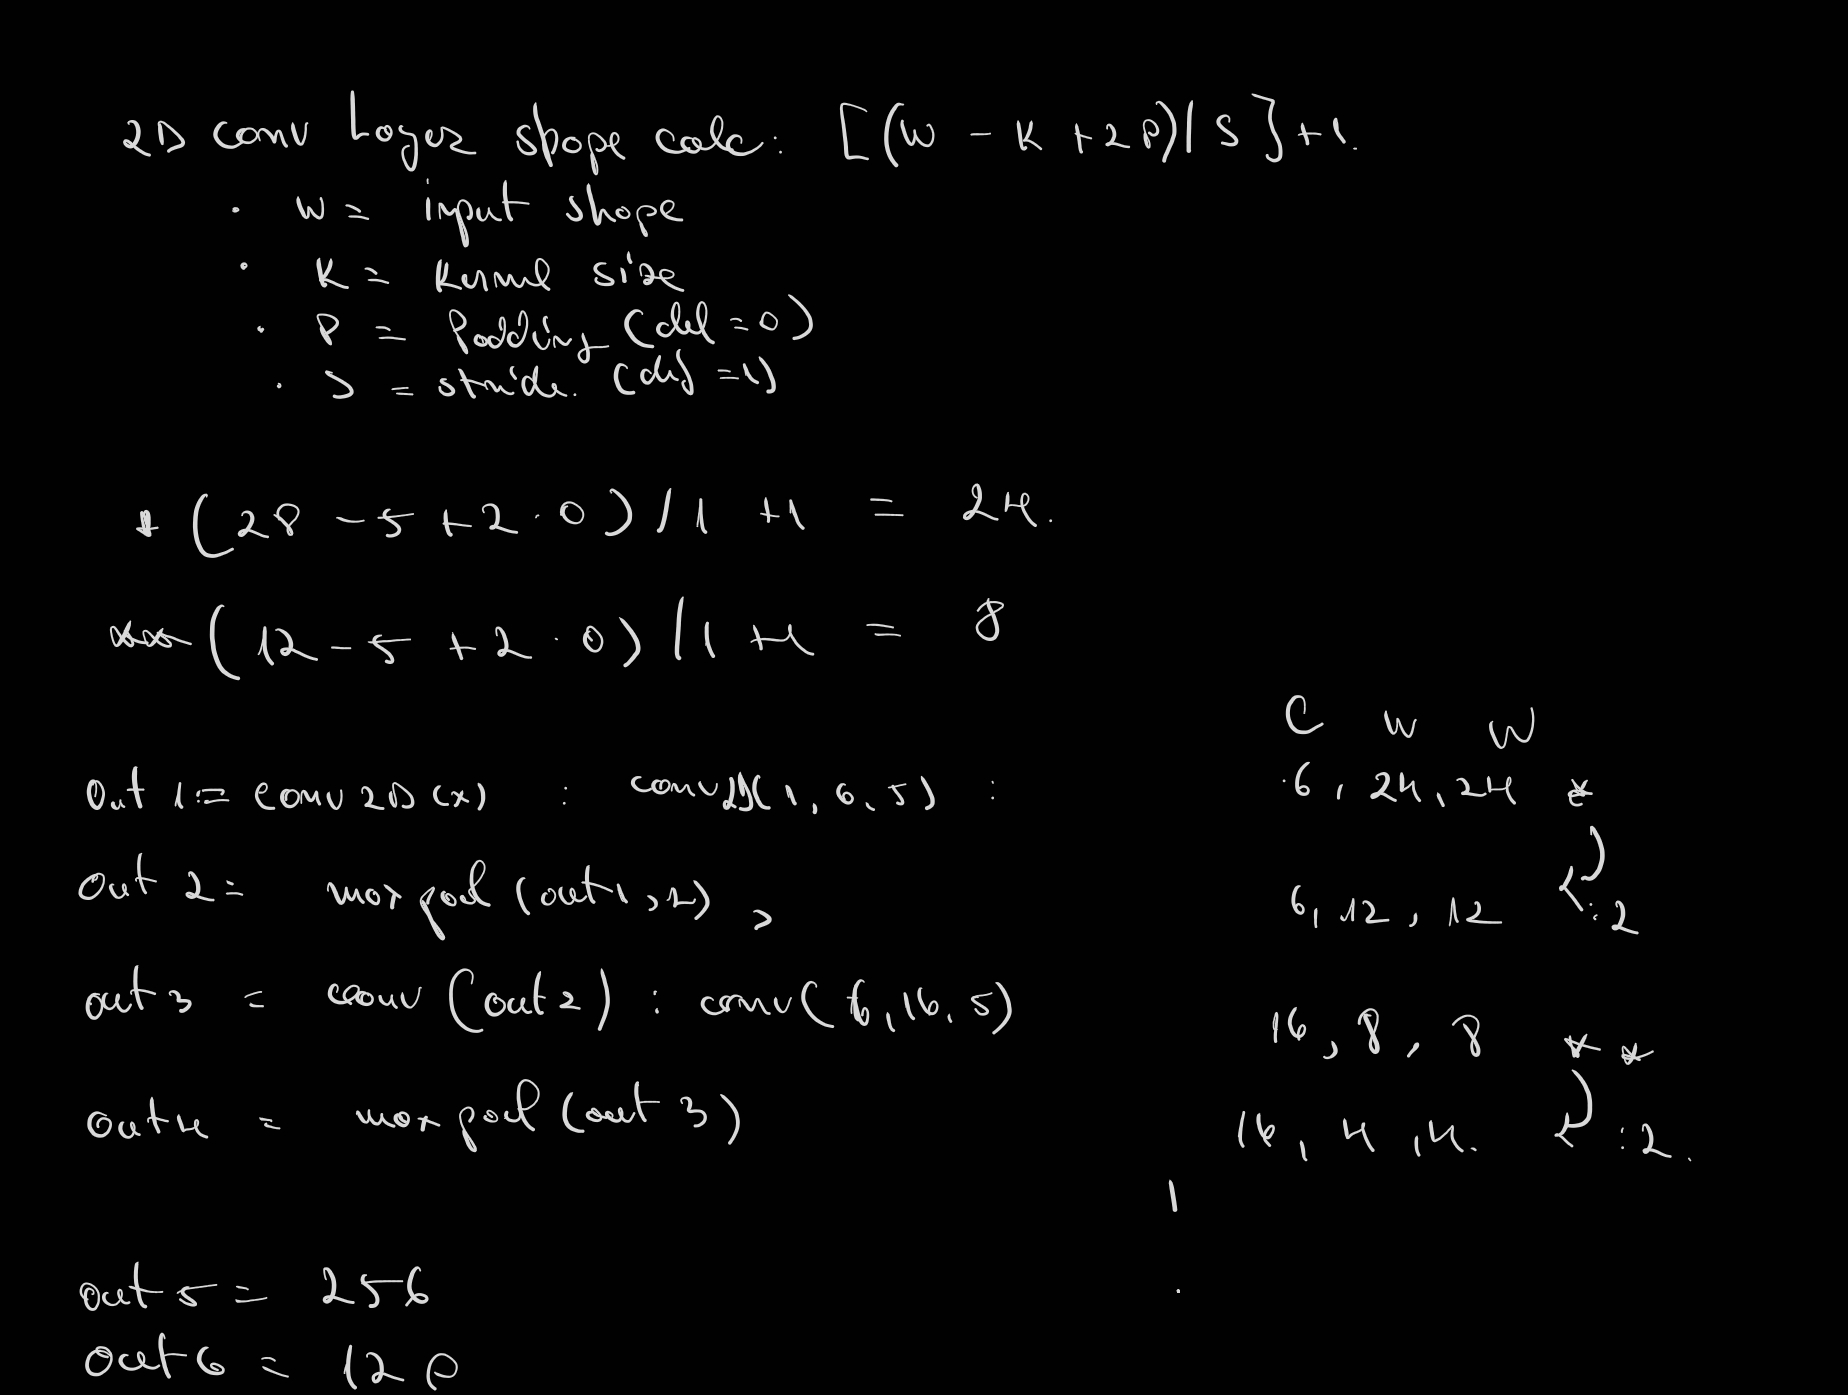

## 4b

In [ ]:
import torch
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
device

'cuda'

## Define the network architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# The embedding architecture returns the
# output of the penultimate layer
class Embed(nn.Module):
    def __init__(self,embedding_dim=84):
        super(Embed, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(256, 120)
        self.fc2   = nn.Linear(120, embedding_dim)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        return out

class Net(nn.Module):
    def __init__(self,embedding_dim, classifier):
        super(Net, self).__init__()
        self.embed = Embed(embedding_dim=embedding_dim)
        self.classifier = classifier

    def forward(self, x):
        out = self.embed(x)
        out = self.classifier(out)
        return out

    def conf(self,x):
        out = self.embed(x)
        return F.softmax(self.classifier(out),dim=1)

## Load the data: the first four MNIST classes

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

classes = ('0', '1', '2', '3')
c=4

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=trans)

# Select only some classes
idx = train_data.targets < c
train_data.targets = train_data.targets[idx]
train_data.data = train_data.data[idx]
trainloader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
# Select only some classes
idx = testset.targets < c
testset.targets = testset.targets[idx]
testset.data = testset.data[idx]
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

==> Preparing data..


## Implementation of the training and testing

In [ ]:
import time
def train_epoch(net, criterion, optimizer, trainloader, verbose=False):
    train_loss, correct, conf = 0, 0, 0
    start_time=time.time()
    net.train()
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        # Set the gradient to zero
        optimizer.zero_grad()
        # Do the forward pass
        logits = net(inputs)
        loss = criterion(logits, targets)
        if verbose:
            print("loss:",loss.item())
        # Do the backward pass
        loss.backward()
        # Do a gradient descent step
        optimizer.step()

        with torch.no_grad(): #Disable gradient tracking and compute some statistics
            train_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    execution_time = (time.time() - start_time)
    n=len(trainloader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f | time (s): %.2f'% (train_loss/len(trainloader), 100.*correct/n, correct, n, 100*conf/n, execution_time))
    return (100.*correct/n, 100*conf/n)

def test_acc(net, criterion, data_loader):
    net.eval()
    test_loss, correct, conf, total = 0,0,0,0
    with torch.no_grad(): # disable gradient tracking
        for batch_idx, (inputs, targets) in enumerate(data_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            logits = net(inputs)
            loss = criterion(logits, targets)

            test_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    n=len(data_loader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f'% (test_loss/max(len(data_loader),1), 100.*correct/n, correct, n, 100*conf/n))
    return (100.*correct/n, 100*conf/n)

## Create the model and perform the optimization for 10 epochs

In [ ]:
import os

d=2
# Model
print('==> Building model..')
classifier = nn.Linear(d, c, bias=True)
net = Net(embedding_dim=d, classifier=classifier)
net = net.to(device)

# criterion = nn.CrossEntropyLoss()

# sgd = torch.optim.SGD([{'params': net.parameters()},],
#                 lr=0.5, momentum=0.9, weight_decay=5e-4)

# Define optimization parameters
learning_rate = 0.005
batch_size = 32
num_epochs = 20
momentum = 0.9
weight_decay = 1e-4
epochs = 15

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)


for epoch in range(epochs):
    print('\nEpoch: %d' % epoch)
    train_epoch(net, criterion, optimizer, trainloader)
    (acc,conf) = test_acc(net,criterion, testloader)

print('Saving..')
state = {'net': net.state_dict(),'acc': acc}
if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
torch.save(state, './checkpoint/net.t7')



==> Building model..

Epoch: 0
Loss: 1.317 | Acc: 37.028% (9166/24754) | Conf 32.09 | time (s): 7.73
Loss: 1.007 | Acc: 67.284% (2797/4157) | Conf 40.37

Epoch: 1
Loss: 0.631 | Acc: 78.210% (19360/24754) | Conf 62.94 | time (s): 9.78
Loss: 0.453 | Acc: 89.079% (3703/4157) | Conf 71.74

Epoch: 2
Loss: 0.375 | Acc: 93.516% (23149/24754) | Conf 75.36 | time (s): 11.12
Loss: 0.277 | Acc: 96.344% (4005/4157) | Conf 80.21

Epoch: 3
Loss: 0.238 | Acc: 96.013% (23767/24754) | Conf 83.94 | time (s): 9.08
Loss: 0.160 | Acc: 97.258% (4043/4157) | Conf 88.66

Epoch: 4
Loss: 0.142 | Acc: 97.099% (24036/24754) | Conf 91.32 | time (s): 4.87
Loss: 0.097 | Acc: 97.955% (4072/4157) | Conf 93.82

Epoch: 5
Loss: 0.097 | Acc: 97.790% (24207/24754) | Conf 94.49 | time (s): 6.34
Loss: 0.074 | Acc: 98.340% (4088/4157) | Conf 95.42

Epoch: 6
Loss: 0.075 | Acc: 98.210% (24311/24754) | Conf 95.74 | time (s): 4.95
Loss: 0.063 | Acc: 98.533% (4096/4157) | Conf 96.48

Epoch: 7
Loss: 0.063 | Acc: 98.538% (24392/2475

## Plot the latent space representations

In [ ]:
# Load the saved net
classifier = nn.Linear(d, c,bias=True)
net = Net(embedding_dim=d, classifier=classifier)
checkpoint = torch.load("checkpoint/net.t7",map_location='cpu')
net.load_state_dict(checkpoint['net'])
net.eval()
print('ACC:\t',checkpoint['acc'])

ACC:	 99.49482800096223


In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def scatter_pictures(inputs, outputs, samples=30):
    zoom = 0.7

    for j in range(min(inputs.shape[0],samples)):
        image = inputs[j,:,:,:].squeeze()
        im = OffsetImage(image, cmap="gray",zoom=zoom)
        ab = AnnotationBbox(im, (outputs[j,0], outputs[j,1]), xycoords='data', frameon=False, alpha=0.5)
        ax.add_artist(ab)

In [ ]:
import matplotlib.pyplot as plt
def plot_conf(conf, show_class_assignment=False, x_max=20, y_max=20, x_min=-1, y_min=-1):
    x = np.arange(x_min, x_max, 0.05)
    y = np.arange(y_min, y_max, 0.05)

    xx, yy = np.meshgrid(x, y)
    X = np.array([xx,yy]).reshape(2,x.shape[0]*y.shape[0]).T
    Z = conf(torch.from_numpy(X).float()).t()
    Z = Z.reshape(-1,y.shape[0],x.shape[0]).cpu().detach().numpy()
    if show_class_assignment:
        h = plt.contourf(x,y,Z.argmax(axis=0),cmap='magma')
    else:
        h = plt.contourf(x,y,Z.max(axis=0),cmap='magma')
        plt.clim(0, 1)
        cb = plt.colorbar()
        cb.set_label('Confidence')
    plt.axis('scaled')

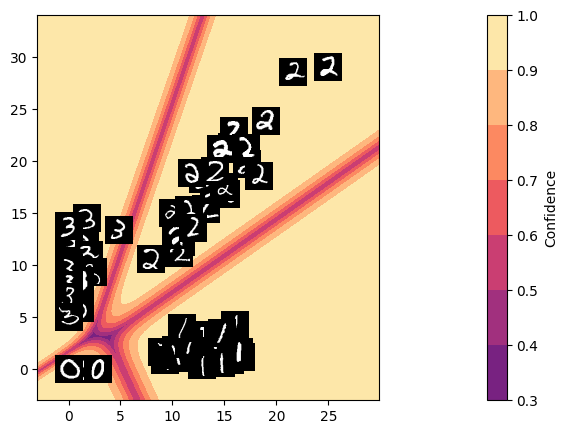

In [ ]:
inputs, targets = next(iter(testloader)) #load a batch
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)

## Plot Representations of out-of-distribution data

In [ ]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
c=10

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
trainloader_fashion = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
testloader_fashion = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, num_workers=2)

==> Preparing data..


In [ ]:
import os

d=2
# Model
print('==> Building model..')
classifier = nn.Linear(d, c, bias=True)
net_f = Net(embedding_dim=d, classifier=classifier)
net_f = net_f.to(device)

# criterion = nn.CrossEntropyLoss()

# sgd = torch.optim.SGD([{'params': net.parameters()},],
#                 lr=0.5, momentum=0.9, weight_decay=5e-4)

# Define optimization parameters
learning_rate = 0.005
batch_size = 32
num_epochs = 20
momentum = 0.9
weight_decay = 1e-4
epochs = 15

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_f.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)


for epoch in range(epochs):
    print('\nEpoch: %d' % epoch)
    train_epoch(net_f, criterion, optimizer, trainloader)
    (acc,conf) = test_acc(net_f,criterion, testloader)

print('Saving..')
state = {'net_f': net_f.state_dict(),'acc': acc}
if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
torch.save(state, './checkpoint/net_f.t7')



==> Building model..

Epoch: 0
Loss: 1.550 | Acc: 41.492% (10271/24754) | Conf 36.42 | time (s): 5.39
Loss: 0.545 | Acc: 82.752% (3440/4157) | Conf 72.20

Epoch: 1
Loss: 0.346 | Acc: 90.652% (22440/24754) | Conf 84.65 | time (s): 4.95
Loss: 0.197 | Acc: 95.357% (3964/4157) | Conf 90.11

Epoch: 2
Loss: 0.179 | Acc: 95.383% (23611/24754) | Conf 92.67 | time (s): 6.22
Loss: 0.125 | Acc: 96.728% (4021/4157) | Conf 94.16

Epoch: 3
Loss: 0.119 | Acc: 96.954% (24000/24754) | Conf 95.11 | time (s): 5.46
Loss: 0.158 | Acc: 95.670% (3977/4157) | Conf 94.63

Epoch: 4
Loss: 0.091 | Acc: 97.689% (24182/24754) | Conf 96.38 | time (s): 6.70
Loss: 0.059 | Acc: 98.725% (4104/4157) | Conf 97.04

Epoch: 5
Loss: 0.072 | Acc: 98.057% (24273/24754) | Conf 97.09 | time (s): 5.93
Loss: 0.058 | Acc: 98.725% (4104/4157) | Conf 97.70

Epoch: 6
Loss: 0.068 | Acc: 98.247% (24320/24754) | Conf 97.41 | time (s): 6.53
Loss: 0.052 | Acc: 98.773% (4106/4157) | Conf 98.40

Epoch: 7
Loss: 0.056 | Acc: 98.525% (24389/2475

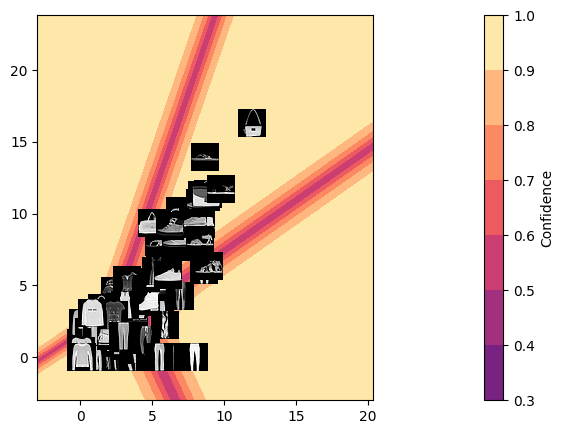

In [ ]:
inputs, targets = next(iter(testloader_fashion))
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)

In [ ]:
# Load the saved net
classifier = nn.Linear(d, c,bias=True)
net_f = Net(embedding_dim=d, classifier=classifier)
checkpoint = torch.load("checkpoint/net_f.t7",map_location='cpu')
net_f.load_state_dict(checkpoint['net_f'])
net.eval()
print('ACC:\t',checkpoint['acc'])

ACC:	 99.54293961991822


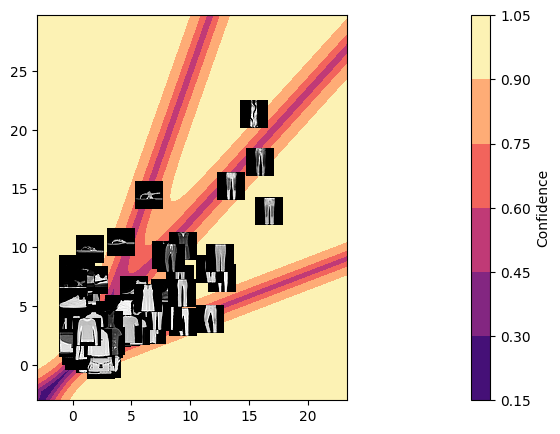

In [ ]:
inputs, targets = next(iter(testloader_fashion))
outputs = net_f.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net_f.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)

In [ ]:
from torchviz import make_dot
# Create a dummy input
dummy_input = torch.rand(1,1, 28, 28)

# Visualize the model using graphviz
dot = make_dot(net_f(dummy_input), params=dict(net_f.named_parameters()))
dot.render("model_graphviz", format="png", cleanup=True)

'model_graphviz.png'

In [ ]:
from torchviz import make_dot
# Visualize the model using torchviz
make_dot(net_f(dummy_input), params=dict(net_f.named_parameters())).render("model_torchviz", format="png")

'model_torchviz.png'

In [ ]:
from torchsummary import summary
# Set up a hook to print dimensions at each layer
def hook(module, input, output):
    print(f"{module.__class__.__name__} output shape:", output.shape)

# Register the hook for each layer
hook_handles = []
for layer in net_f.children():
    hook_handles.append(layer.register_forward_hook(hook))

# Forward pass to trigger the hooks
output = net_f(dummy_input)

# Remove the hooks after using them
for handle in hook_handles:
    handle.remove()

summary(net_f.cuda(), input_size = (1,28,28), batch_size = -1)

Embed output shape: torch.Size([1, 2])
Linear output shape: torch.Size([1, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
            Conv2d-2             [-1, 16, 8, 8]           2,416
            Linear-3                  [-1, 120]          30,840
            Linear-4                    [-1, 2]             242
             Embed-5                    [-1, 2]               0
            Linear-6                   [-1, 10]              30
Total params: 33,684
Trainable params: 33,684
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.13
Estimated Total Size (MB): 0.17
----------------------------------------------------------------
